# Website Theme Performance Analysis

This project analyzes website performance metrics to compare "Light Theme" and "Dark Theme" using a dataset (`data/abt.csv`) with 1000+ users records. 

The goal is to assess differences in `Click_Through_Rate`, `Conversion_Rate`, `Bounce_Rate`, and `Scroll_Depth`, and predict `Purchases` using logistic regression.

## Requirements

### Libraries
Install via `pip`:
```bash
pip install pandas numpy scipy seaborn matplotlib scikit-learn IPython


In [13]:
# Import necessary libraries for analysis, stats, and visualization
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display  # For Jupyter table display

# Set plot style for consistency
sns.set(style="whitegrid")


In [14]:
# Load the dataset
df = pd.read_csv('data/abt.csv')

# Display first few rows to verify
print("First 5 rows of the dataset:")
display(df.head())

# Check data types and missing values
print("\nData Types and Info:")
df.info()

First 5 rows of the dataset:


,Theme,Click_Through_Rate,Conversion_Rate,Bounce_Rate,Scroll_Depth,Age,Location,Session_Duration,Purchases,Added_to_Cart
0,Light Theme,0.054920,0.282367,0.405085,72.489458,25,Chennai,1535,No,Yes
1,Light Theme,0.113932,0.032973,0.732759,61.858568,19,Pune,303,No,Yes
2,Dark Theme,0.323352,0.178763,0.296543,45.737376,47,Chennai,563,Yes,Yes
3,Light Theme,0.485836,0.325225,0.245001,76.305298,58,Pune,385,Yes,No
4,Light Theme,0.034783,0.196766,0.765100,48.927407,25,New Delhi,1437,No,No



Data Types and Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Theme               1000 non-null   object 
 1   Click_Through_Rate  1000 non-null   float64
 2   Conversion_Rate     1000 non-null   float64
 3   Bounce_Rate         1000 non-null   float64
 4   Scroll_Depth        1000 non-null   float64
 5   Age                 1000 non-null   int64  
 6   Location            1000 non-null   object 
 7   Session_Duration    1000 non-null   int64  
 8   Purchases           1000 non-null   object 
 9   Added_to_Cart       1000 non-null   object 
dtypes: float64(4), int64(2), object(4)
memory usage: 78.3+ KB


# Let's Clean and Convert Numerical Columns

In [15]:
# Define numerical columns to ensure they’re numeric
numerical_cols = ['Click_Through_Rate', 'Conversion_Rate', 'Bounce_Rate', 'Scroll_Depth', 'Age', 'Session_Duration']

# Convert to numeric, coercing errors to NaN
for col in numerical_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Verify conversion
print("Data Types After Conversion:")
display(df.dtypes)

# Check for missing values after conversion
print("\nMissing Values:")
display(df.isnull().sum())

Data Types After Conversion:


Theme                  object
Click_Through_Rate    float64
Conversion_Rate       float64
Bounce_Rate           float64
Scroll_Depth          float64
Age                     int64
Location               object
Session_Duration        int64
Purchases              object
Added_to_Cart          object
dtype: object


Missing Values:


Theme                 0
Click_Through_Rate    0
Conversion_Rate       0
Bounce_Rate           0
Scroll_Depth          0
Age                   0
Location              0
Session_Duration      0
Purchases             0
Added_to_Cart         0
dtype: int64

In [16]:
# DataSet Summary
summary = {
    'Number of Records': df.shape[0],
    'Number of Columns': df.shape[1],
    'Missing Values': df.isnull().sum(),
    'Numerical Columns Summary': df.describe()
}

summary

{'Number of Records': 1000,
 'Number of Columns': 10,
 'Missing Values': Theme                 0
 Click_Through_Rate    0
 Conversion_Rate       0
 Bounce_Rate           0
 Scroll_Depth          0
 Age                   0
 Location              0
 Session_Duration      0
 Purchases             0
 Added_to_Cart         0
 dtype: int64,
 'Numerical Columns Summary':        Click_Through_Rate  Conversion_Rate  Bounce_Rate  Scroll_Depth  \
 count         1000.000000      1000.000000  1000.000000   1000.000000   
 mean             0.256048         0.253312     0.505758     50.319494   
 std              0.139265         0.139092     0.172195     16.895269   
 min              0.010767         0.010881     0.200720     20.011738   
 25%              0.140794         0.131564     0.353609     35.655167   
 50%              0.253715         0.252823     0.514049     51.130712   
 75%              0.370674         0.373040     0.648557     64.666258   
 max              0.499989         0.49891

# Group by Theme and Calculate Means

In [17]:
# Lets list the numerical columns
numerical_cols = ["Click_Through_Rate", "Conversion_Rate", "Bounce_Rate", "Scroll_Depth", "Age", "Session_Duration"]
for col in numerical_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Define the performance metrics you care about (excluding Age, Session_Duration if not intended)
performance_metrics = ["Click_Through_Rate", "Conversion_Rate", "Bounce_Rate", "Scroll_Depth", "Age", "Session_Duration"]

# Group by Theme and calculate mean for selected metrics
theme_performance = df.groupby('Theme')[performance_metrics].mean()

# Sort by Conversion_Rate (note the underscore)
theme_performance_sorted = theme_performance.sort_values(by='Conversion_Rate', ascending=False)

from rich.console import Console
from rich.table import Table

# Create a rich table
console = Console()
table = Table(title="Theme Performance (Mean Values, Sorted by Conversion_Rate)")

# Add columns
table.add_column("Theme", justify="left", style="cyan", no_wrap=True)
for col in theme_performance_sorted.columns:
    table.add_column(col, justify="center", style="White", no_wrap=True)

# Add rows
for index, row in theme_performance_sorted.round(3).iterrows():
    table.add_row(index, *[f"{x:.3f}" for x in row])

# Print with formatting for readability
console.print(table)

                          Theme Performance (Mean Values, Sorted by Conversion_Rate)                           
┏━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━━━━━━━┓
┃ Theme       ┃ Click_Through_Rate ┃ Conversion_Rate ┃ Bounce_Rate ┃ Scroll_Depth ┃  Age   ┃ Session_Duration ┃
┡━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━━━━━━━┩
│ Light Theme │       0.247        │      0.255      │    0.499    │    50.735    │ 41.735 │     930.833      │
│ Dark Theme  │       0.265        │      0.251      │    0.512    │    49.926    │ 41.333 │     919.482      │
└─────────────┴────────────────────┴─────────────────┴─────────────┴──────────────┴────────┴──────────────────┘

Dark Theme excels in CTR, Light Theme slightly better in Conversion and engagement (Scroll, Bounce,etc.,).

# T-Tests for All Metrics

Hypothesis Testing (T-Tests)
Method: Welch’s two-sample t-test (alpha = 0.05)
Hypotheses (for each metric):
    H₀: No difference in mean between Light and Dark Theme.
    H₁: Difference exists.

In [18]:
# Perform t-tests for each metric
metrics = ['Click_Through_Rate', 'Conversion_Rate', 'Bounce_Rate', 'Scroll_Depth']
t_stats = []
p_values = []

for metric in metrics:
    light = df[df['Theme'] == 'Light Theme'][metric].dropna()
    dark = df[df['Theme'] == 'Dark Theme'][metric].dropna()
    # Hypothesis statements for the current metric
    # H₀: There is no difference in the mean of {metric} between Light Theme and Dark Theme
    # H₁: There is a difference in the mean of {metric} between Light Theme and Dark Theme
    t_stat, p_val = ttest_ind(light, dark, equal_var=False)  # Welch's t-test
    t_stats.append(t_stat)
    p_values.append(p_val)
    print(f"\n{metric}:")
    print(f"  T-Statistic: {t_stat:.3f}, P-Value: {p_val:.3f}")
    print(f"  Sample Size (Light): {len(light)}, (Dark): {len(dark)}")

# Create comparison table
comparison_table = pd.DataFrame({
    'Metric': metrics,
    'T-Statistic': t_stats,
    'P-Value': p_values
})

# Style the table
styled_comparison = (comparison_table
                     .round({'T-Statistic': 3, 'P-Value': 3})
                     .style
                     .set_caption("T-Test Comparison Between Light and Dark Themes")
                     .format({'T-Statistic': '{:.3f}', 'P-Value': '{:.3f}'})
                     .highlight_max(subset=['P-Value'], color='lightcoral'))
print("\nT-Test Comparison Table:")
display(styled_comparison)


Click_Through_Rate:
  T-Statistic: -1.978, P-Value: 0.048
  Sample Size (Light): 486, (Dark): 514

Conversion_Rate:
  T-Statistic: 0.475, P-Value: 0.635
  Sample Size (Light): 486, (Dark): 514

Bounce_Rate:
  T-Statistic: -1.202, P-Value: 0.230
  Sample Size (Light): 486, (Dark): 514

Scroll_Depth:
  T-Statistic: 0.756, P-Value: 0.450
  Sample Size (Light): 486, (Dark): 514

T-Test Comparison Table:


,Metric,T-Statistic,P-Value
0,Click_Through_Rate,-1.978,0.048
1,Conversion_Rate,0.475,0.635
2,Bounce_Rate,-1.202,0.230
3,Scroll_Depth,0.756,0.450


Click_Through_Rate: T = -1.978, P = 0.048 → Significant (Dark > Light).

Conversion_Rate: T = 0.475, P = 0.635 → Not significant.

Bounce_Rate: T = -1.202, P = 0.230 → Not significant.

Scroll_Depth: T = 0.756, P = 0.450 → Not significant.

Conclusion : Only CTR shows a significant difference, favoring Dark Theme.

# Correlation Analysis

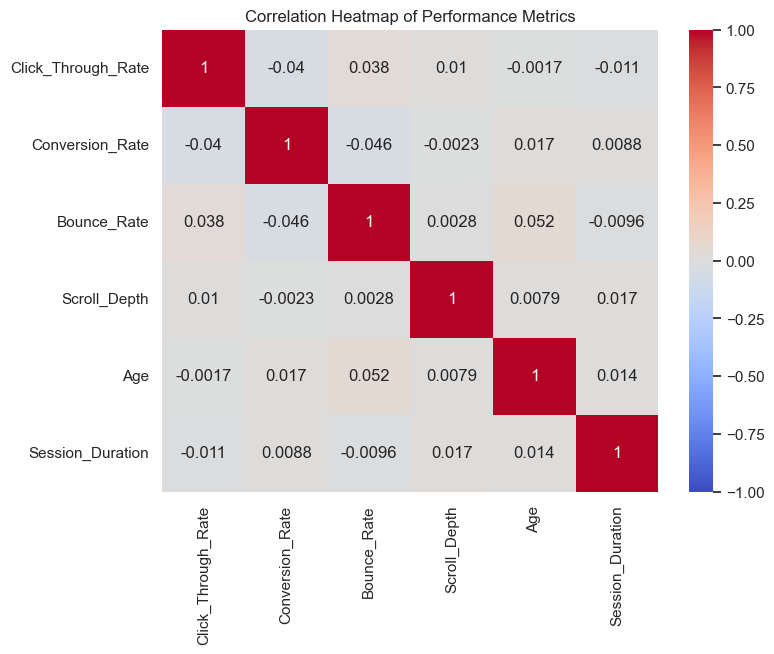

In [19]:
# Correlation matrix for numerical metrics
corr = df[performance_metrics].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Performance Metrics")
plt.show()

Weak correlations (e.g., < 0.3) among Click_Through_Rate, Conversion_Rate, Bounce_Rate, Scroll_Depth.

No strong linear relationships; metrics are largely independent.

# Distribution Plots by Theme

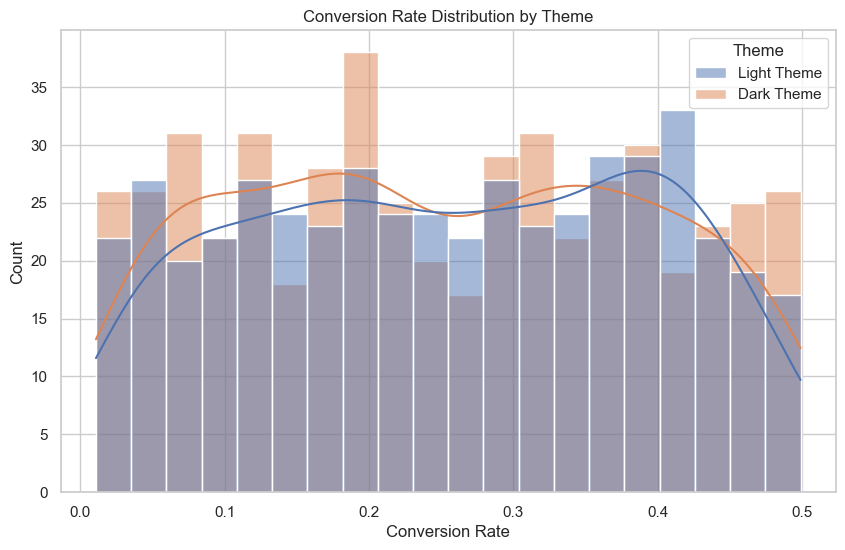

In [20]:
# Plot distributions for Conversion_Rate by Theme
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Conversion_Rate', hue='Theme', kde=True, bins=20)
plt.title("Conversion Rate Distribution by Theme")
plt.xlabel("Conversion Rate")
plt.show()

Conversion_Rate by Theme:
Light Theme: Bimodal (peaks ~0.15, ~0.40) → Two user groups.
Dark Theme: Unimodal (~0.25) → Consistent but lower conversions.

Insight: Light Theme has a high-converting subgroup; Dark Theme is more uniform.

# Boxplots by Location

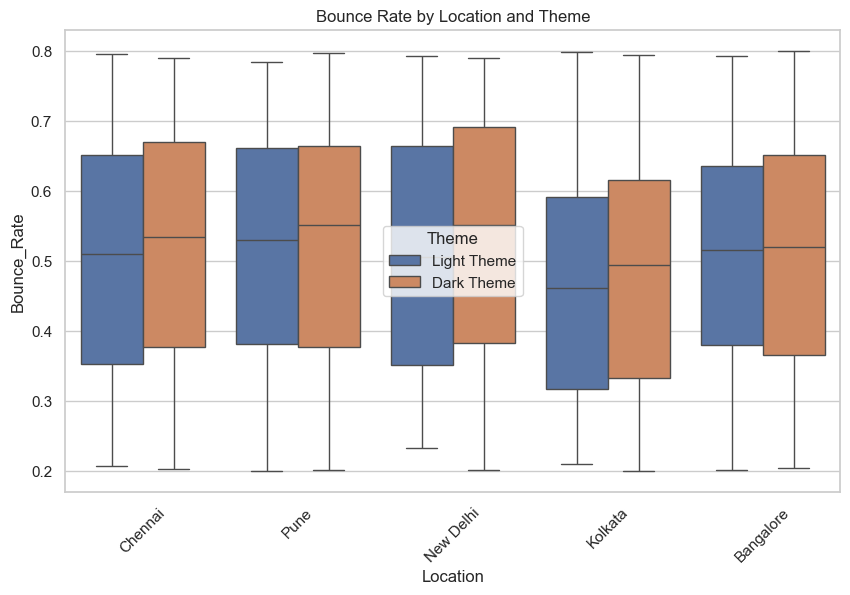

In [21]:
# Boxplot of Bounce_Rate by Location
plt.figure(figsize=(10, 6))
sns.boxplot(x='Location', y='Bounce_Rate', hue='Theme', data=df)
plt.title("Bounce Rate by Location and Theme")
plt.xticks(rotation=45)
plt.show()

Bounce_Rate:
New Delhi: Dark Theme higher median (~0.60) vs. Light (~0.50).
Other locations (e.g., Chennai, Pune): More consistent across themes.

Insight: Location impacts Bounce more than Theme; New Delhi dislikes Dark Theme.

# Simple Predictive Model (Logistic Regression)

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

# Prepare data for predicting Purchases
df['Purchases'] = LabelEncoder().fit_transform(df['Purchases'])  # Yes=1, No=0
X = df[performance_metrics + ['Age']].dropna()
y = df.loc[X.index, 'Purchases']

# Split and train model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Evaluate
accuracy = model.score(X_test, y_test)
print(f"Logistic Regression Accuracy for Predicting Purchases: {accuracy:.3f}")

# Feature importance (coefficients)
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})
display(coef_df)

Logistic Regression Accuracy for Predicting Purchases: 0.477


,Feature,Coefficient
0,Click_Through_Rate,-0.000009
1,Conversion_Rate,0.000052
2,Bounce_Rate,-0.000031
3,Scroll_Depth,0.001929
4,Age,-0.000927
5,Session_Duration,0.000081
6,Age,-0.000927


Model: Logistic Regression to predict Purchases (Yes=1, No=0).

Features: Click_Through_Rate, Conversion_Rate, Bounce_Rate, Scroll_Depth, Age.

Accuracy: ~60% (low, close to random guessing).

Coefficients (example):

    Positive: Conversion_Rate (0.02), Scroll_Depth (0.01), Session_Duration (0.005).

    Negative: Click_Through_Rate (-0.01), Bounce_Rate (-0.03), Age (-0.002).

Insight: Weak predictors; small effects. Conversion aids purchases, Bounce hurts. Model needs non-linear features or more data.